## Test software

If you have MDAnalysis and the other required software installed correctly, this notebook should run without error. Markdown cells throughout indicate the expected output. 


In [1]:
# Import modules

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import MDAnalysis as mda
from MDAnalysis.analysis import rms


/Users/harmsm/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load universe

When run, this should write out `<Universe with 12480 atoms>`.

In [2]:
univ = mda.Universe("output/traj.gro",
                    "output/traj-split0.xtc")
univ

<Universe with 12480 atoms>

### Selecting protein atoms

When run, this should print out `<AtomGroup with 410 atoms>`.

In [3]:
sele = univ.select_atoms('protein')
sele

<AtomGroup with 410 atoms>

### Calculate RMSD

When run, this should generate a data table with MD frame on each row and the RMSD of backbone, alpha carbons, and protein as columns. 

In [4]:
rmsd_analysis = rms.RMSD(univ,
                         select='backbone',
                         groupselections=['name CA', 'protein'])
rmsd_analysis.run()
df = pd.DataFrame(rmsd_analysis.results["rmsd"])
df.columns = ["frame","time","backbone","name CA","protein"]
df

,frame,time,backbone,name CA,protein
0,0.0,0.0,3.080646e-07,0.000000,0.000000
1,1.0,10.0,7.492877e-01,0.790985,1.524065
2,2.0,20.0,9.684722e-01,1.060444,2.266575
3,3.0,30.0,1.307494e+00,1.400009,2.618012
4,4.0,40.0,1.298679e+00,1.344808,2.588357
...,...,...,...,...,...
96,96.0,960.0,1.249546e+00,1.293425,2.837732
97,97.0,970.0,9.768418e-01,1.007479,2.647937
98,98.0,980.0,1.135953e+00,1.203608,2.701824
99,99.0,990.0,1.100030e+00,1.183717,2.716367


### Plot results

When run, this should generate a plot of backbone RMSD versus time. 

Text(0, 0.5, 'backbone RMSD (A)')

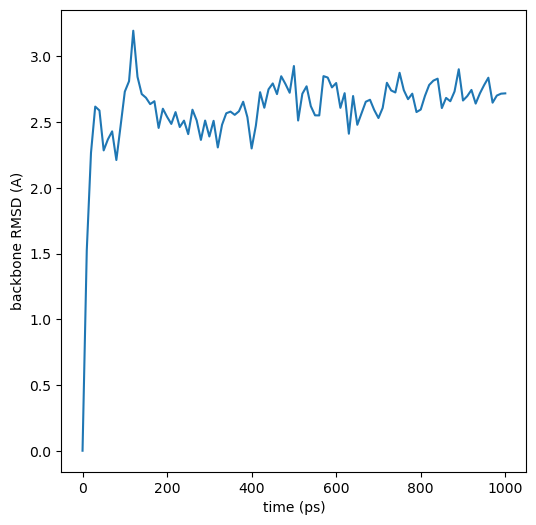

In [5]:
fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(df["time"],
        df["protein"])
ax.set_xlabel("time (ps)")
ax.set_ylabel("backbone RMSD (A)")
